In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files into DataFrames
crash_df = pd.read_csv("crash.csv")
crash_cause_df = pd.read_csv("crash_cause.csv")
crash_weather_df = pd.read_csv("crash_weather.csv")
crash_injury_df = pd.read_csv("crash_injury.csv")
crash_location_df = pd.read_csv("crash_location.csv")

# Merge all DataFrames on 'Crash_ID'
merged_df = crash_df.merge(crash_cause_df, on='Crash_ID') \
                    .merge(crash_weather_df, on='Crash_ID') \
                    .merge(crash_injury_df, on='Crash_ID') \
                    .merge(crash_location_df, on='Crash_ID')

/var/folders/9h/b1pwb2j960d0603t66yx57l80000gn/T/ipykernel_5525/4006557875.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crashes = merged_df.resample('M').size()


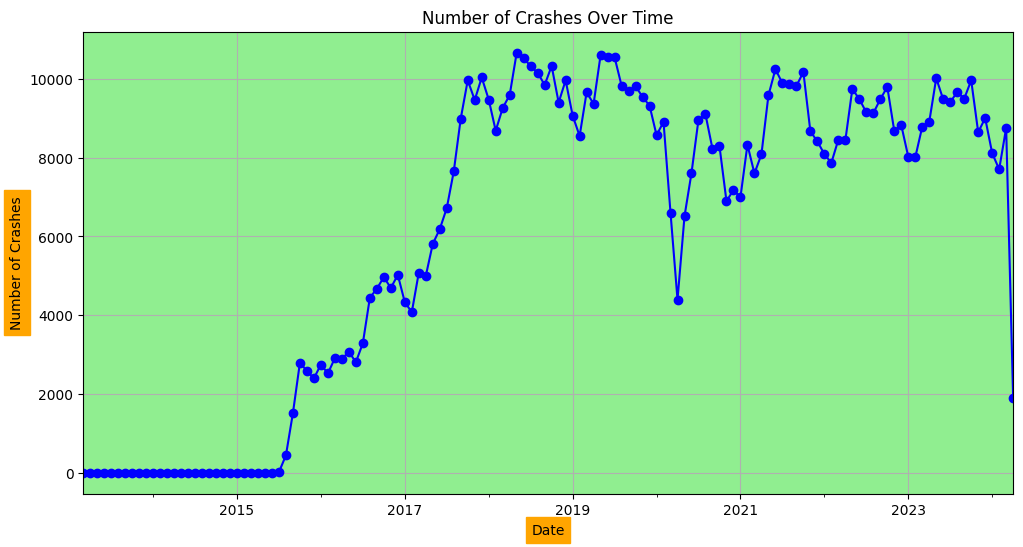

In [26]:
# Time series plot (line plot) to visualize the number of crashes over time
plt.figure(figsize=(12, 6))
monthly_crashes = merged_df.resample('M').size()
monthly_crashes.plot(marker='o', linestyle='-', color='blue')  
plt.title('Number of Crashes Over Time')  # Set background color for title
plt.xlabel('Date', backgroundcolor='orange')  # Set background color for x-axis label
plt.ylabel('Number of Crashes', backgroundcolor='orange')  # Set background color for y-axis label
plt.grid(True)
plt.gca().set_facecolor('lightgreen')  # Set background color for plot area
plt.show()


<Figure size 1000x1000 with 0 Axes>

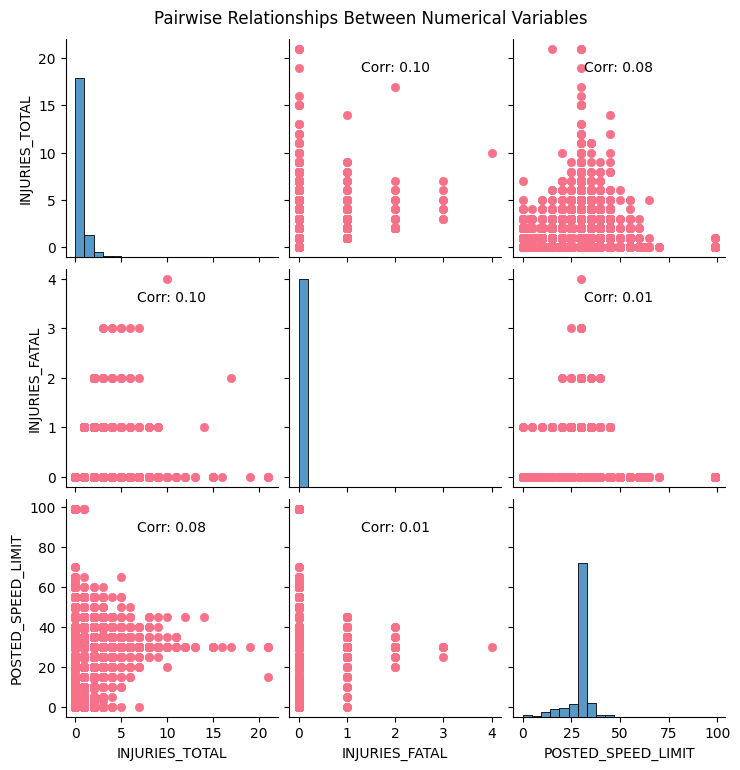

In [68]:
# Custom color palette
custom_palette = sns.color_palette("husl", 3)  

# Pair Plot - Pairwise relationships between numerical variables
plt.figure(figsize=(10, 10))
pairplot = sns.pairplot(merged_df[['INJURIES_TOTAL', 'INJURIES_FATAL', 'POSTED_SPEED_LIMIT']])

# Set color for scatter plot markers
for i in range(len(pairplot.axes)):
    for j in range(len(pairplot.axes)):
        if i != j:
            pairplot.axes[i, j].collections[0].set_color(custom_palette[0])  # Adjust index if needed
            
            # Add correlation value to the plot
            corr_value = merged_df[['INJURIES_TOTAL', 'INJURIES_FATAL', 'POSTED_SPEED_LIMIT']].corr().iloc[i, j]
            pairplot.axes[i, j].annotate(f"Corr: {corr_value:.2f}", xy=(0.5, 0.85), xycoords='axes fraction',
                                         ha='center', fontsize=10, color='black')

plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02 )
plt.show()


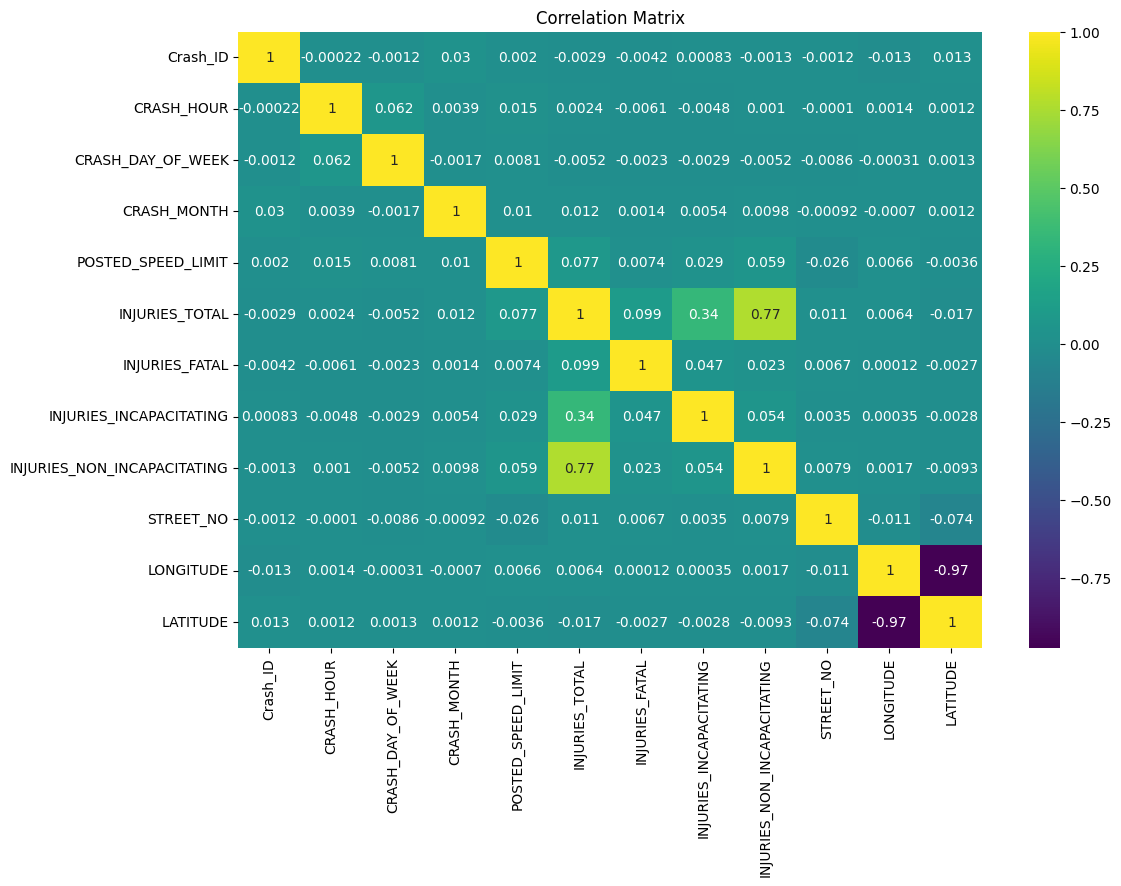

In [45]:
# Correlation matrix as a heatmap to explore relationships between numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')  
plt.title('Correlation Matrix')
plt.show()


/var/folders/9h/b1pwb2j960d0603t66yx57l80000gn/T/ipykernel_5525/1097150388.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y='PRIM_CONTRIBUTORY_CAUSE', order=filtered_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index , palette=custom_palette)


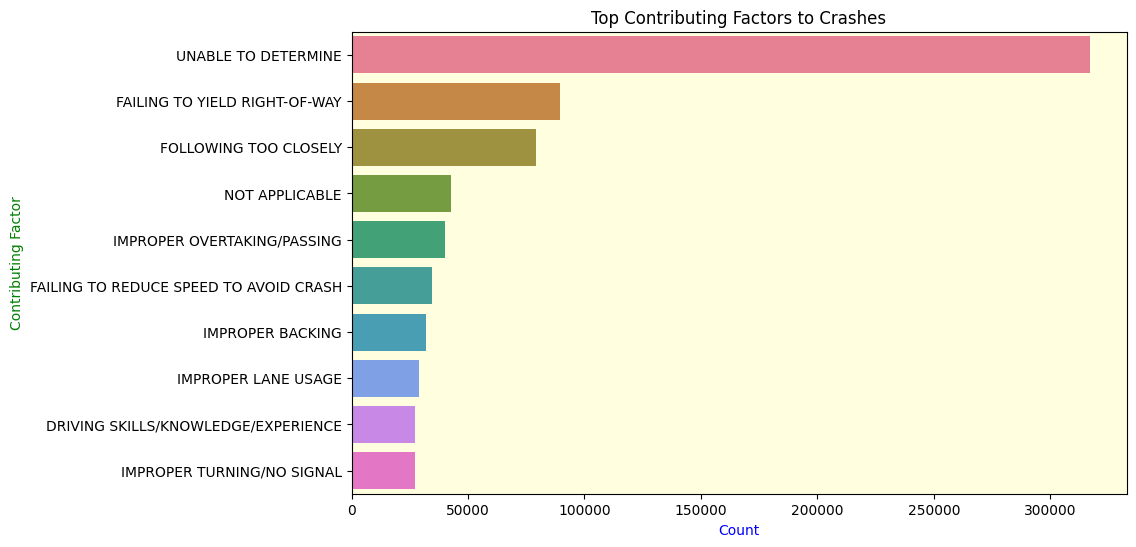

In [51]:
# Plot horizontal bar plot

# Custom color palette
custom_palette = sns.color_palette("husl", 10)  

# Get top N contributing factors
top_factors = merged_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10).index.tolist()

# Filter DataFrame for top factors
filtered_df = merged_df[merged_df['PRIM_CONTRIBUTORY_CAUSE'].isin(top_factors)]

# Plot count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_df, y='PRIM_CONTRIBUTORY_CAUSE', order=filtered_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index , palette=custom_palette)
plt.title('Top Contributing Factors to Crashes')

# Set label colors
plt.xlabel('Count', color='blue')
plt.ylabel('Contributing Factor', color='green')

# Set background color for the plot area
ax.set_facecolor('lightyellow')

plt.show()


/var/folders/9h/b1pwb2j960d0603t66yx57l80000gn/T/ipykernel_5525/1906933189.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='MOST_SEVERE_INJURY', y='INJURIES_TOTAL', palette=custom_palette)
/var/folders/9h/b1pwb2j960d0603t66yx57l80000gn/T/ipykernel_5525/1906933189.py:6: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=merged_df, x='MOST_SEVERE_INJURY', y='INJURIES_TOTAL', palette=custom_palette)


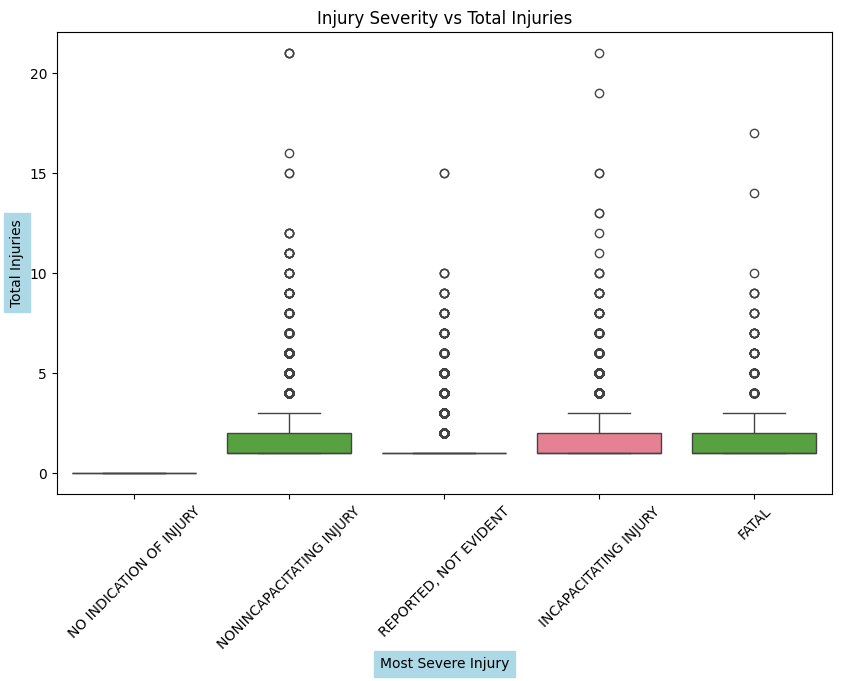

In [57]:
# Custom color palette
custom_palette = sns.color_palette("husl", 3) 

# Injury Severity Distribution - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='MOST_SEVERE_INJURY', y='INJURIES_TOTAL', palette=custom_palette)
plt.title('Injury Severity vs Total Injuries')
plt.xlabel('Most Severe Injury' , backgroundcolor = 'lightblue')
plt.ylabel('Total Injuries' , backgroundcolor = 'lightblue' )
plt.xticks(rotation=45)
plt.show()


/var/folders/9h/b1pwb2j960d0603t66yx57l80000gn/T/ipykernel_5525/2624924731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='ROADWAY_SURFACE_COND', y='INJURIES_TOTAL', inner='quartile', palette=custom_palette)
/var/folders/9h/b1pwb2j960d0603t66yx57l80000gn/T/ipykernel_5525/2624924731.py:6: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=merged_df, x='ROADWAY_SURFACE_COND', y='INJURIES_TOTAL', inner='quartile', palette=custom_palette)


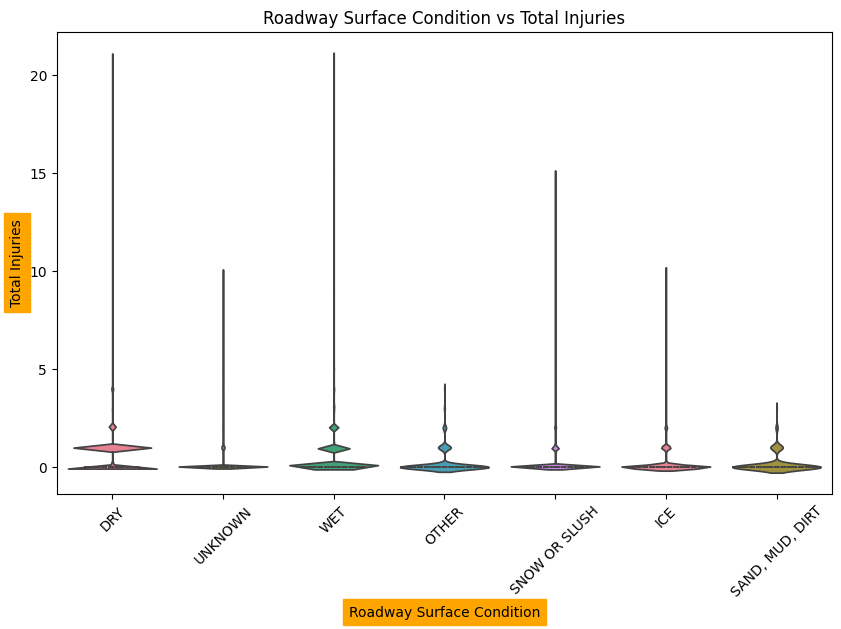

In [63]:
# Custom color palette
custom_palette = sns.color_palette("husl", 5) 

# Roadway Surface Condition Distribution - Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x='ROADWAY_SURFACE_COND', y='INJURIES_TOTAL', inner='quartile', palette=custom_palette)
plt.title('Roadway Surface Condition vs Total Injuries')
plt.xlabel('Roadway Surface Condition' , backgroundcolor = 'orange')
plt.ylabel('Total Injuries' , backgroundcolor = 'orange')
plt.xticks(rotation=45)
plt.show()


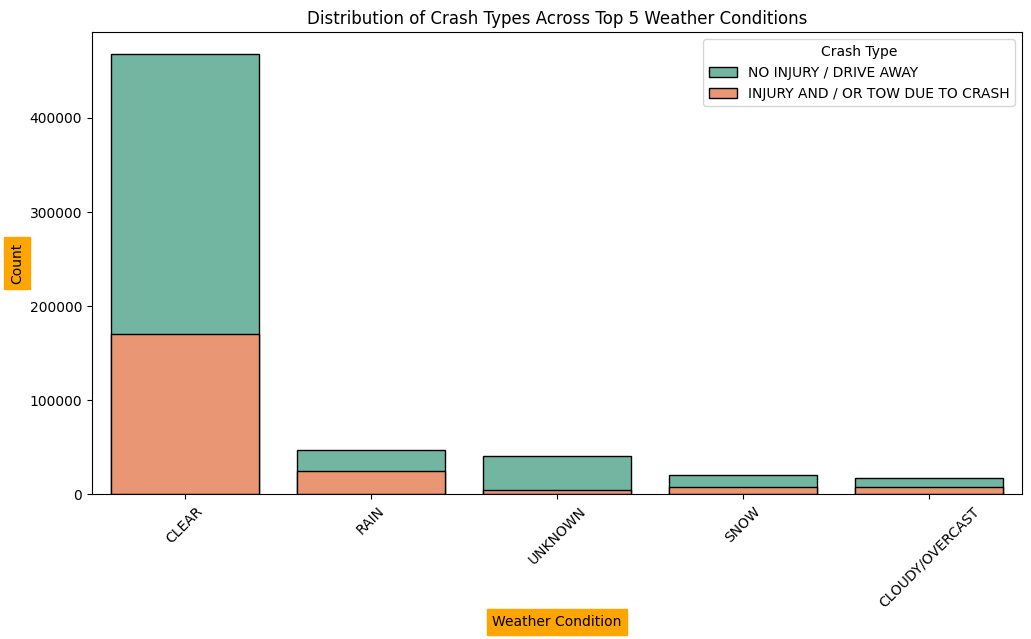

In [65]:
#Stacked Bar plot for Crash type contribution across different weather conditions

# Get top 5 weather conditions
top_weather_conditions = merged_df['WEATHER_CONDITION'].value_counts().head(5).index

# Filter data for top 5 weather conditions
filtered_df = merged_df[merged_df['WEATHER_CONDITION'].isin(top_weather_conditions)]

# Plotting the stacked bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='WEATHER_CONDITION', hue='CRASH_TYPE', order=top_weather_conditions, palette='Set2', edgecolor='black', linewidth=1, saturation=0.75, dodge=False)
plt.title('Distribution of Crash Types Across Top 5 Weather Conditions')
plt.xlabel('Weather Condition' ,backgroundcolor = 'orange')
plt.ylabel('Count',backgroundcolor = 'orange')
plt.xticks(rotation=45)
plt.legend(title='Crash Type')
plt.show()
